# Notas de aula sobre regressão logistica

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importação e análise exploratória dos dados

Seção destinada a importar e analisar os dados na tentativa de observar como as variáveis se comportam umas com as outras.

In [136]:
train = pd.read_csv('titanic_train.csv')

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Utilizando seaborn, posso visualizar e analisar os dados faltantes para concluir se é viável ou não incluir determinada variável na analise.
Uma forma de fazer isso é criar um heatmap dos dados com o método isnull() aplicado.

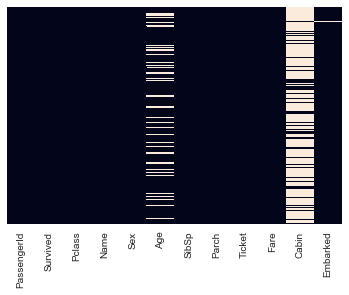

In [108]:
ax = sns.heatmap(train.isnull(), yticklabels=False,cbar = False)

Percebe-se que praticamente não tenho informação do número da cabine e é bem provável que essa variável venha a ser excluida da análise.

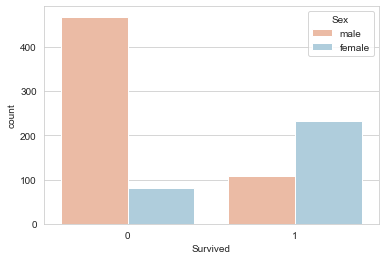

In [109]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train,hue='Sex', palette = 'RdBu')

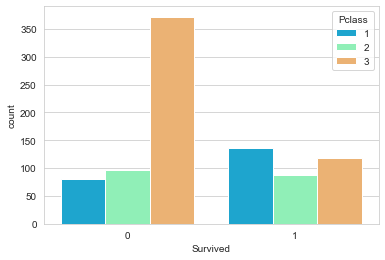

In [110]:
sns.countplot(x = 'Survived', data = train,hue='Pclass', palette = 'rainbow')

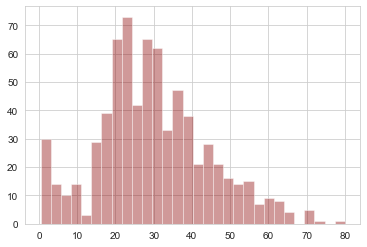

In [111]:
train['Age'].hist(bins=30, color='darkred', alpha = 0.4)

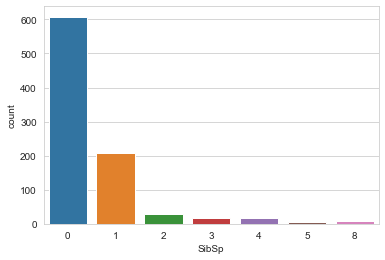

In [112]:
sns.countplot(x = 'SibSp', data= train)

## Analise de dados faltantes

Esta parte será utilizada para tratar dados faltantes do SET, eles poderiam ser simplesmente excluidas porém dependendo do volume de dados, pode ser bastante prejudicial para o modelo preditor.

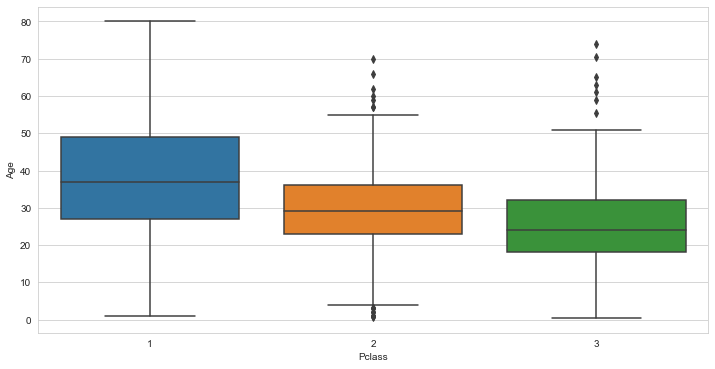

In [113]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y = 'Age', data = train)

Ideias de como tratar dados faltantes da coluna de idade:

- Simplesmente deletar os dados.
- Preencher com a média da classe (podem ser utilizadas outras variáveis).
- Preencher com números aleatórios considerando a faixa de concentração das idades em cada classe.

In [138]:
# Definição de uma função para tratar os dados faltantes da coluna idade

def input_age(cols):
    
    idade = cols[0]
    classe = cols[1]
    if pd.isnull(idade):
        
        if classe == 1:
            
            idade = 37
        
        elif classe ==2:
            
            idade =  29
        
        else:
            idade = 24
        
    return idade

In [139]:
train['Age'] =  train[['Age','Pclass']].apply(input_age, axis = 1)

Neste ponto, os dados de idade estão tratados. Agora vamos voltar as atenções para os dados de cabine que estão com uma quantidade grande de dados faltantes. Neste caso vamos simplesmente remover a coluna da análise.

In [140]:
# Tratamento para coluna Cabin
del train['Cabin']

In [141]:
# Tratamento para coluna Embark que tem apenas um dados faltante. Neste caso vamos apenas deletar as linhas com dados nulos.
train.dropna(inplace = True)

In [142]:
train_touse = train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]

## Tratamento de dados categoricos

Nesta parte vamos tratar os dados categoricos para transoforma-los em números que possam ser levados em consideração pelo nosso modelo.

In [143]:
# Criação de um novo dataframe onde a variável categórica Sex foi transformada em um dado númerico (1 - Male 0 - Female)
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [144]:
# Criação de um novo dataframe onde a variável categórica Embarked foi transformada em um dado númerico (0,0 - C 0,1 - S 1,0 - Q)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [145]:
train_touse = pd.concat([train_touse,sex,embark], axis=1)

In [146]:
train_touse

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [147]:
train_touse.set_index('PassengerId', inplace = True)

In [148]:
train_touse

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,24.0,1,2,23.4500,0,0,1


Neste ponto os dados de treino já estão tratados, agora vamos focar em tratar os dados de teste, pois eles tem que apresentar mesmo formato para que o modelo funcione.

In [149]:
test = pd.read_csv('titanic_test.csv')

In [150]:
del test['Cabin']

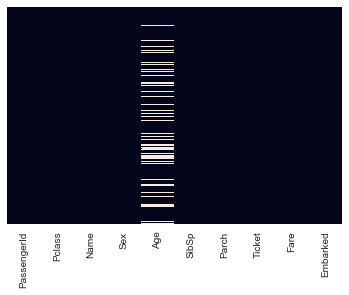

In [151]:
ax = sns.heatmap(test.isnull(), yticklabels=False,cbar = False)

In [152]:
test['Age'] = test[['Age','Pclass']].apply(input_age, axis = 1)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [156]:
# Criação de um novo dataframe onde a variável categórica Sex foi transformada em um dado númerico (1 - Male 0 - Female)
sex = pd.get_dummies(test['Sex'], drop_first = True)

In [157]:
# Criação de um novo dataframe onde a variável categórica Embarked foi transformada em um dado númerico (0,0 - C 0,1 - S 1,0 - Q)
embark = pd.get_dummies(test['Embarked'], drop_first = True)

In [158]:
test_touse = pd.concat([test,sex,embark], axis=1)

In [160]:
test_touse.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [200]:
test_final = test_touse[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'male', 'Q', 'S']]

In [201]:
test_final.set_index('PassengerId', inplace=True)

# Agora sim, definir o modelo de machine learning que será utilizado

In [168]:
from sklearn.linear_model import LogisticRegression

In [170]:
# Definição das variáveis X-train e y_train para calibração do modelo

X_train = train_touse[['Pclass','Age', 'SibSp', 'Parch','Fare', 'male','Q','S']]

In [175]:
y_train = train_touse[['Survived']]

In [176]:
logmodel = LogisticRegression()

In [177]:
logmodel.fit(X_train,y_train)

C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
test_final.fillna(value = test_final['Fare'].mean())

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0
895,3,27.0,0,0,8.6625,1,0,1
896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,24.0,0,0,8.0500,1,0,1
1306,1,39.0,0,0,108.9000,0,0,0
1307,3,38.5,0,0,7.2500,1,0,1


In [213]:
predictions = logmodel.predict(test_final)

In [217]:
test_final.reset_index(inplace=True)

In [218]:
test_final['Survived'] = predictions

C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
results = test_final[['PassengerId','Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [224]:
results.set_index('PassengerId').to_csv('results.csv')

Este foi o primeiro desafio do kaggle. Foi uma boa oportunidade de testar o modelo de regressão logistica!